In [1]:
import pandas as pd
import numpy as np
import math 
import os 
from datetime import datetime, timedelta
import pymap3d # python3 -m pip install pymap3d
import random
import pickle
from scipy import stats
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
# conda install -c conda-forge tikzplotlib
import tikzplotlib 
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save
from bokeh.layouts import gridplot, row, column
from bokeh.models import Range1d
output_notebook() 


Loading BokehJS ...

In [2]:
dataset="cabspotting" # OPTIONS ARE: cabspotting privamov
user="oilrag" # Examples: abboip oilrag 51 90 14
sol_file='solutions/'+dataset+'/'+user
Colors = ['navy', 'darkorange', 'red', 
         'blue', 'teal', 'indigo',  'darkred', 'purple',  'darkgreen']
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 4


In [3]:
save_data_raw = pickle.load( open( sol_file+"/save_data_raw.pkl", "rb" ) )
Timer = save_data_raw['Timer'].to_numpy()
xr = save_data_raw['xr'].to_numpy()
yr = save_data_raw['yr'].to_numpy()

save_data = pickle.load( open( sol_file+"/save_data.pkl", "rb" ) )
Time = save_data['Time'].to_numpy()
xs = save_data['xs'].to_numpy()
ys = save_data['ys'].to_numpy()
bs = save_data['bs'].to_numpy()

ts = Time[1] - Time[0]  # Sampling time
tmax = Time[-1]  # Final time
nt = len(Time)
print(nt)

160


In [4]:
# Vector for plotting, removed the non-transmitted instants
Timep = Time[bs != 0]
xsp = xs[bs != 0] 
ysp = ys[bs != 0] 

In [5]:

fig = figure(plot_width=900, plot_height=450)
fig.line(Timer, xr, line_color='navy', legend_label="x", alpha=0.2)
fig.circle(Timer, xr, line_color='navy', legend_label="x", fill_alpha=0.2, alpha=0.2)
fig.line(Timep, xsp, line_color='navy', legend_label="x")
fig.circle(Timep, xsp, line_color='navy', color = 'cyan', legend_label="x")
fig.line(Timer, yr, line_color='red', legend_label="y", alpha=0.2)
fig.circle(Timer, yr, line_color='red', legend_label="y", fill_alpha=0.2, alpha=0.2)
fig.line(Timep, ysp, line_color='red', legend_label="y")
fig.circle(Timep, ysp, line_color='red', color = 'pink', legend_label="y")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "distance [m]"
show(fig)

fig = figure(plot_width=900, plot_height=450)
fig.line(xsp, ysp, line_color='navy', legend_label="p")
fig.circle(xsp, ysp, color='navy', legend_label="p")
fig.line(xr, yr, line_color='navy', legend_label="p raw", alpha=0.2)
fig.circle(xr, yr, color='navy', legend_label="p raw", fill_alpha=0.2, alpha=0.2)
fig.xaxis.axis_label = "x"
fig.yaxis.axis_label = "y"
show(fig)


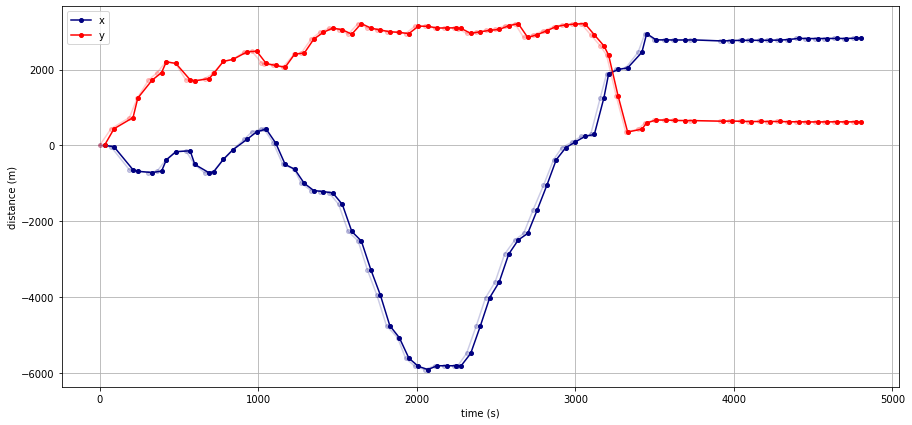

In [6]:
plt.figure(figsize=(15, 7))
plt.plot(Timep, xsp, "o-", color='navy')
plt.plot(Timep, ysp, "o-", color='red')
plt.plot(Timer, xr, "o-", color='navy', alpha=0.2)
plt.plot(Timer, yr, "o-", color='red', alpha=0.2)
plt.xlabel("time (s)")
plt.ylabel("distance (m)")
plt.legend(['x', 'y'])
plt.grid(True)

tikzplotlib.save(sol_file+"/time_evol.tex")


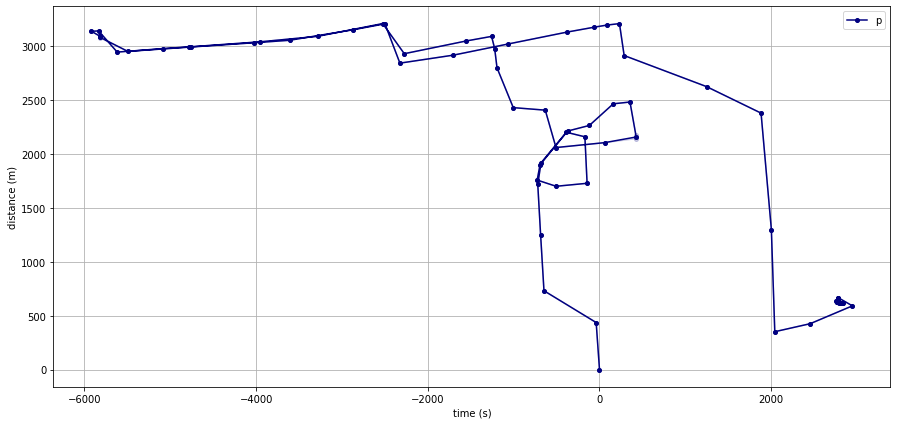

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(xsp, ysp, "o-", color='navy')
plt.plot(xr, yr, "o-", color='navy', alpha=0.2)
plt.xlabel("time (s)")
plt.ylabel("distance (m)")
plt.legend(['p'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol0.tex")


## Random obfuscation protocol

In [8]:
Data_real = pickle.load( open( sol_file+"/Data_real.pkl", "rb" ) )
xs = Data_real['x'].to_numpy()
ys = Data_real['y'].to_numpy()
bs = Data_real['b'].to_numpy()
barx = Data_real['barx'].to_numpy()
bary = Data_real['bary'].to_numpy()
priv = Data_real['priv'].to_numpy()

Data_obf = pickle.load( open( sol_file+"/Data_GeoI.pkl", "rb" ) )
x_obf = Data_obf['x'].to_numpy()
y_obf = Data_obf['y'].to_numpy()
d0 = Data_obf['U'].to_numpy()
d1 = Data_obf['V'].to_numpy()
delta = np.array([d0, d1])
barx_obf = Data_obf['barx'].to_numpy()
bary_obf = Data_obf['bary'].to_numpy()
priv_obf = Data_obf['priv'].to_numpy()
util = Data_obf['util'].to_numpy()


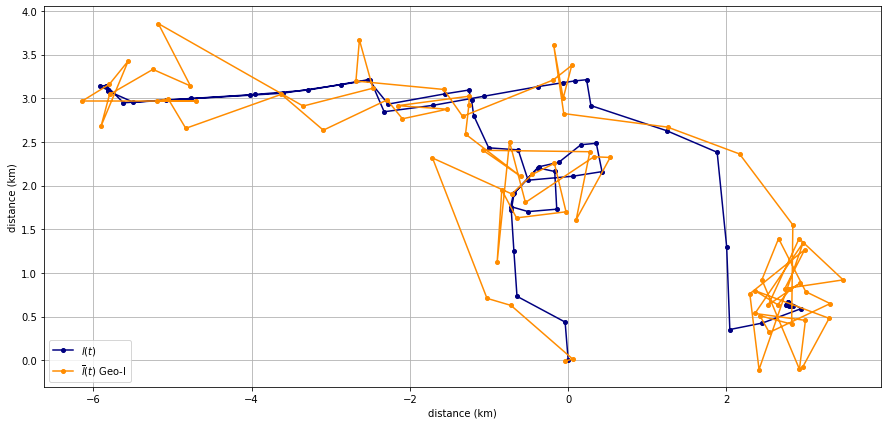

In [9]:
fig = figure(plot_width=900, plot_height=450)
fig.line(xsp, ysp, line_color='navy', legend_label="p")
fig.circle(np.multiply(xs,bs), np.multiply(ys,bs), color='navy', legend_label="p")
# fig.circle(np.multiply(xs,bs), np.multiply(ys,bs), color='navy', legend_label="p")
fig.circle(np.multiply(x_obf,bs), np.multiply(y_obf,bs), color='orange', legend_label="p obf")
#fig.line(barx, bary, line_color='navy', legend_label="centr", alpha=0.2)
#fig.circle(barx, bary, color='navy', legend_label="centr", fill_alpha=0.2, alpha=0.2)
#fig.line(barx_obf, bary_obf, line_color='orange', legend_label="centr obf", alpha=0.2)
#fig.circle(barx_obf, bary_obf, color='orange', legend_label="centr obf", fill_alpha=0.2, alpha=0.2)
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "distance (m)"
show(fig)

plt.figure(figsize=(15, 7))
plt.plot(xsp/1000, ysp/1000, "o-", color=Colors[0])
#plt.plot(barx, bary, "o-", color=Colors[0], alpha=0.2)
#plt.plot(np.multiply(x_obf,bs), np.multiply(y_obf,bs), "o", color=Colors[1])
plt.plot(x_obf[bs!=0]/1000, y_obf[bs!=0]/1000, "o-", color=Colors[1])
#plt.plot(barx_obf, bary_obf, "o-", color=Colors[1], alpha=0.2)
#plt.plot(np.multiply(xs,bs), np.multiply(ys,bs), "o-", color=Colors[0])
plt.xlabel("distance (km)")
plt.ylabel("distance (km)")
plt.legend(['$l(t)$', '$\overline{l}(t)$ Geo-I '],loc='lower left')
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol1_v3.tex")

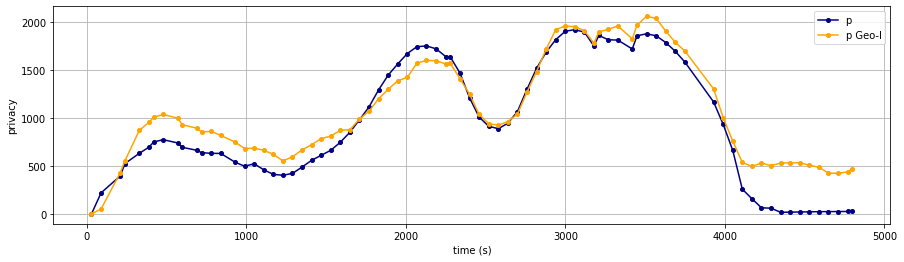

In [10]:
fig = figure(plot_width=900, plot_height=250)
fig.line(Time[bs>0], priv[bs>0], line_color='navy', legend_label="p")
fig.circle(Time[bs>0], priv[bs>0], color='navy', legend_label="p ")
fig.line(Time[bs>0], priv_obf[bs>0], line_color='orange', legend_label="p Geo-I")
fig.circle(Time[bs>0], priv_obf[bs>0], color='orange', legend_label="p Geo-I")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy"
show(fig)

plt.figure(figsize=(15, 4))
plt.plot(Time[bs>0], priv[bs>0], "o-", color='navy')
plt.plot(Time[bs>0], priv_obf[bs>0], "o-", color='orange')
plt.xlabel("time (s)")
plt.ylabel("privacy")
plt.legend(['p', 'p Geo-I'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv1.tex")

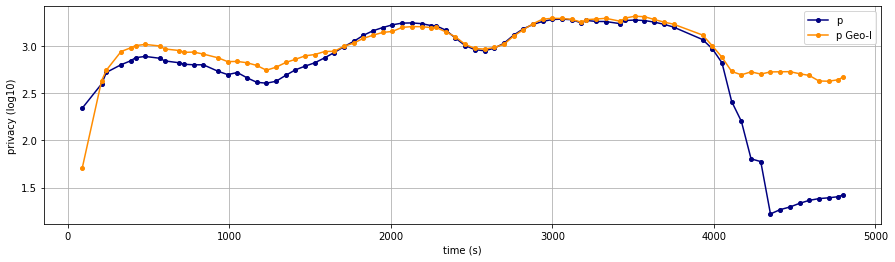

In [11]:
fig = figure(plot_width=900, plot_height=250)
fig.line(Time[(bs>0) & (priv>0)], np.log10(priv[(bs>0) & (priv>0)]), line_color='navy', legend_label="p")
fig.circle(Time[(bs>0) & (priv>0)], np.log10(priv[(bs>0) & (priv>0)]), color='navy', legend_label="p ")
fig.line(Time[(bs>0) & (priv>0)], np.log10(priv_obf[(bs>0) & (priv>0)]), line_color='orange', legend_label="p Geo-I")
fig.circle(Time[(bs>0) & (priv>0)], np.log10(priv_obf[(bs>0) & (priv>0)]), color='orange', legend_label="p Geo-I")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy (log10)"
show(fig)


plt.figure(figsize=(15, 4))
plt.plot(Time[(bs>0) & (priv>0)], np.log10(priv[(bs>0) & (priv>0)]), "o-", color=Colors[0])
plt.plot(Time[(bs>0) & (priv>0)], np.log10(priv_obf[(bs>0) & (priv>0)]), "o-", color=Colors[1])
plt.xlabel("time (s)")
plt.ylabel("privacy (log10)")
plt.legend(['p', 'p Geo-I'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv_log1.tex")

203.74426702207933


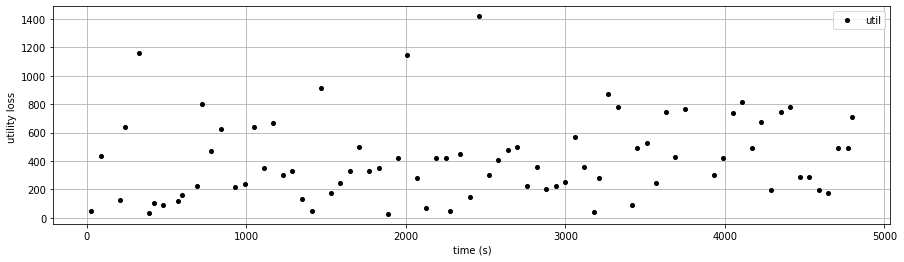

In [12]:
fig = figure(plot_width=900, plot_height=250)
fig.circle(Time[bs>0], util[bs>0], color=Colors[1], legend_label="u")
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "utility loss "
show(fig)
print(util.mean())

plt.figure(figsize=(15, 4))
plt.plot(Time[bs>0], util[bs>0], "o", color='k')
plt.xlabel("time (s)")
plt.ylabel("utility loss ")
plt.legend(['util'])
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_util_log1_v2.tex")

## Model predictive control

In [13]:
# Load data MPC
horizons = pickle.load( open( sol_file+"/Horizons_MPC.pkl", "rb" ) )
Data_MPC = pickle.load( open( sol_file+"/Data_MPC.pkl", "rb" ) )


In [14]:
#solution time statics
for h in horizons:
    tiempos=Data_MPC[h]['time']
    print('Horizon ',h)
    print(tiempos.loc[tiempos>0].describe())

Horizon  1
count    78.000000
mean      0.089868
std       0.020823
min       0.062826
25%       0.076051
50%       0.086774
75%       0.100140
max       0.209147
Name: time, dtype: float64
Horizon  2
count    77.000000
mean      0.145676
std       0.030256
min       0.081815
25%       0.118692
50%       0.144643
75%       0.163661
max       0.232376
Name: time, dtype: float64
Horizon  5
count    76.000000
mean      0.444379
std       0.113571
min       0.151651
25%       0.391672
50%       0.425374
75%       0.484954
max       0.880679
Name: time, dtype: float64
Horizon  10
count    73.000000
mean      1.180870
std       0.367199
min       0.300187
25%       0.942482
50%       1.142967
75%       1.329068
max       2.553175
Name: time, dtype: float64
Horizon  15
count    71.000000
mean      1.741060
std       0.667536
min       0.519600
25%       1.248961
50%       1.607610
75%       2.108426
max       3.262136
Name: time, dtype: float64


In [15]:
# Privacy evaluation
ntemp = len(xs)
for h in horizons:
    ntemp = np.min([ntemp,len(np.array(Data_MPC[h].x))])

p_raw = np.array([priv[i] for i in range(ntemp) if bs[i]!=0]).mean()
p_obf = np.array([priv_obf[i] for i in range(ntemp) if bs[i]!=0]).mean()
print("Privacy raw: ", p_raw)
print("Privacy Gauss: ", p_obf, "  ", (p_obf-p_raw)/p_raw)

P_mpc = []
Pper_mpc = []
for h in horizons:
    p_mpc = np.array(Data_MPC[h].loc[Data_MPC[h].util>0].priv)[0:ntemp].mean()
    print("Privacy MPC: h = " + str(h) + "  ", p_mpc, "  ", (p_mpc-p_raw)/p_raw, " ",(p_mpc-p_obf)/p_obf)
    
    P_mpc += [p_mpc]
    Pper_mpc += [(p_mpc-p_raw)/p_raw]

util_mpc = Data_MPC[h].util
Util_mpc = pd.DataFrame(util_mpc)
Util_mpc[Util_mpc > 0].describe()


Privacy raw:  1043.9616311083319
Privacy Gauss:  1140.888970207371    0.09284569107787535
Privacy MPC: h = 1   1185.0966472716043    0.13519176563360388   0.038748448112525875
Privacy MPC: h = 2   1195.3583326848213    0.1450213274751848   0.047742912675849555
Privacy MPC: h = 5   1208.1347204072006    0.15725969653173247   0.058941537656908814
Privacy MPC: h = 10   1249.3968794434877    0.19678428997151318   0.095108211289302
Privacy MPC: h = 15   1286.1829822967927    0.23202131569845555   0.12735157923650783


,util
count,70.000000
mean,416.199308
std,290.384961
min,28.020346
25%,216.034382
50%,354.191428
75%,560.881550
max,1418.316063


Loading BokehJS ...

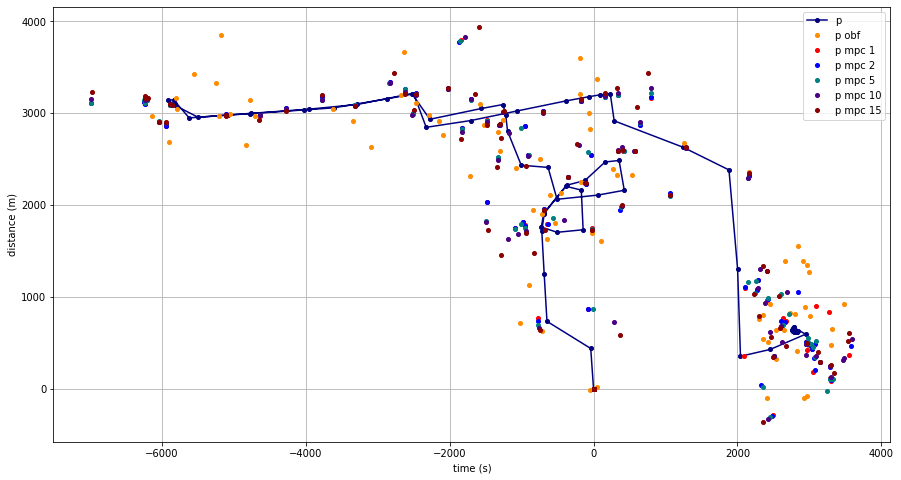

In [16]:
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save
from bokeh.layouts import gridplot, row, column
from bokeh.models import Range1d
from numpy import random
output_notebook()

#Trace plot
fig = figure(plot_width=900, plot_height=450)
fig.line(xsp, ysp, line_color='navy', legend_label="p")
fig.circle(np.multiply(xs,bs), np.multiply(ys,bs), color='navy', legend_label="p")
fig.line(barx, bary, line_color='navy', legend_label="centr", alpha=0.2)
fig.circle(barx, bary, color='navy', legend_label="centr", fill_alpha=0.2, alpha=0.2)
fig.circle(np.multiply(x_obf,bs), np.multiply(y_obf,bs), color='orange', legend_label="p obf")
#fig.line(barx_obf, bary_obf, line_color='orange', legend_label="centr obf", alpha=0.2)
#fig.circle(barx_obf, bary_obf, color='orange', legend_label="centr obf", fill_alpha=0.2, alpha=0.2)
for h in horizons:
    x_mpc = Data_MPC[h].x
    y_mpc = Data_MPC[h].y
    barx_mpc = Data_MPC[h].barx
    bary_mpc = Data_MPC[h].bary
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    fig.circle(np.multiply(x_mpc,bs[0:len(y_mpc)]), 
           np.multiply(y_mpc,bs[0:len(y_mpc)]), color=color, legend_label="p mpc "+str(h))
    #fig.line(barx_mpc, bary_mpc, line_color=color, legend_label="centr mpc "+str(h), alpha=0.2)
    #fig.circle(barx_mpc, bary_mpc, color=color, legend_label="centr mpc "+str(h), fill_alpha=0.2, alpha=0.2)
fig.xaxis.axis_label = "x"
fig.yaxis.axis_label = "y"
show(fig)


plt.figure(figsize=(15, 8))
plt.plot(xsp, ysp, "o-", color=Colors[0])
# plt.plot(np.multiply(xs,bs), np.multiply(ys,bs), "o-", color=Colors[0])
#plt.plot(barx, bary, "o-", color=Colors[0], alpha=0.2)
plt.plot(np.multiply(x_obf,bs), np.multiply(y_obf,bs), "o", color=Colors[1])
#plt.plot(barx_obf, bary_obf, "o-", color=Colors[1], alpha=0.2)
lgnd = ['p']
#lgnd += ['centr']
lgnd += ['p obf']
#lgnd += ['centr obf']
plt.legend(['p'])
plt.grid(True)
i = 2
for h in horizons:
    x_mpc = Data_MPC[h].x
    y_mpc = Data_MPC[h].y
    barx_mpc = Data_MPC[h].barx
    bary_mpc = Data_MPC[h].bary
    plt.plot(np.multiply(x_mpc,bs[0:len(y_mpc)]), 
           np.multiply(y_mpc,bs[0:len(y_mpc)]), "o", color=Colors[i])
    lgnd += ["p mpc "+str(h)]
    #plt.plot(barx_mpc, bary_mpc, "o-", color=Colors[i], alpha=0.2)
    #lgnd += ["centr mpc "+str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("distance (m)")
plt.legend(lgnd)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol_mpc.tex")

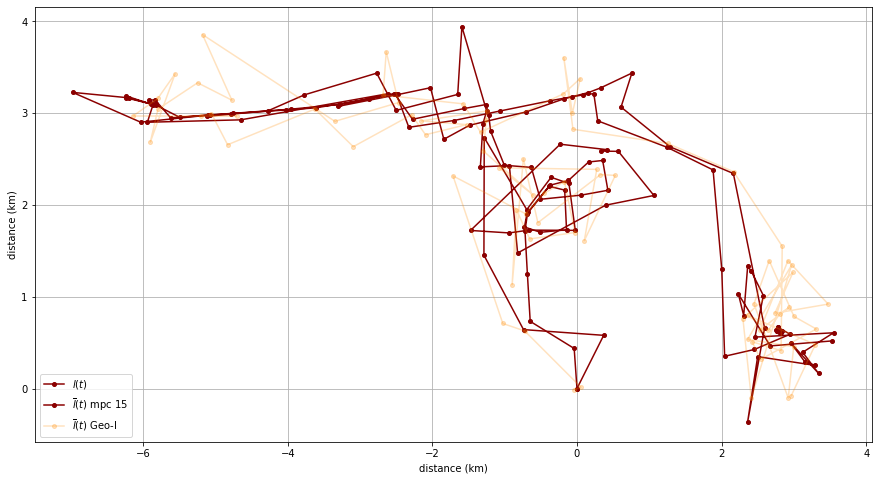

In [17]:
#Trace
#p vs mpc-1 y 15
#h=1 #color 2
h=15 #color 6
plt.figure(figsize=(15, 8))
plt.plot(xsp/1000, ysp/1000, "o-", color=Colors[6])
#plt.plot(x_obf[bs!=0], y_obf[bs!=0], "o-", color=Colors[1])

lgnd = ['$l(t)$']#, '$\overline{l}(t)$ Geo-I ']
plt.legend(['p'])
plt.grid(True)


x_mpc = Data_MPC[h].x
y_mpc = Data_MPC[h].y
barx_mpc = Data_MPC[h].barx
bary_mpc = Data_MPC[h].bary
plt.plot(x_mpc[bs[0:len(y_mpc)]!=0]/1000, 
           y_mpc[bs[0:len(y_mpc)]!=0]/1000, "o-", color=Colors[6])
lgnd += ["$\overline{l}(t)$ mpc "+str(h)]

plt.plot(x_obf[bs!=0]/1000, y_obf[bs!=0]/1000, "o-", color=Colors[1],alpha=0.25)
lgnd += ['$\overline{l}(t)$ Geo-I']

plt.xlabel("distance (km)")
plt.ylabel("distance (km)")
plt.legend(lgnd,loc='lower left')

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/xy_evol_mpc"+str(h)+"_geoI.tex")

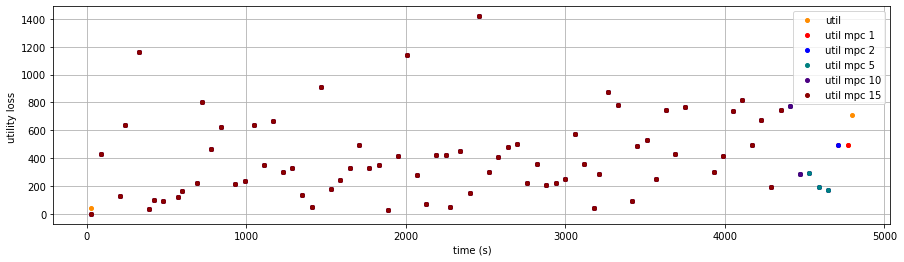

In [21]:
fig = figure(plot_width=900, plot_height=250)
fig.circle(Time[bs>0], util[bs>0], color=Colors[1], legend_label="util Geo-I")
i = 2
for h in horizons:
    util_mpc = Data_MPC[h].util
    fig.circle(Time[0:len(util_mpc)][bs[0:len(util_mpc)]>0], util_mpc[0:len(util_mpc)][bs[0:len(util_mpc)]>0], color=Colors[i], 
               legend_label="util mpc "+str(h))
    i += 1
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "utility loss"
show(fig)


fig = figure(plot_width=900, plot_height=250)
plt.figure(figsize=(15, 4))
plt.plot(Time[bs>0], util[bs>0], "o", color=Colors[1])
lgnd = ['util']
i = 2
for h in horizons:
    util_mpc = Data_MPC[h].util
    plt.plot(Time[0:len(util_mpc)][bs[0:len(util_mpc)]>0], util_mpc[0:len(util_mpc)][bs[0:len(util_mpc)]>0],
             "o", color=Colors[i])
    lgnd += ['util mpc ' + str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("utility loss ")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_util_mpc_log.tex")


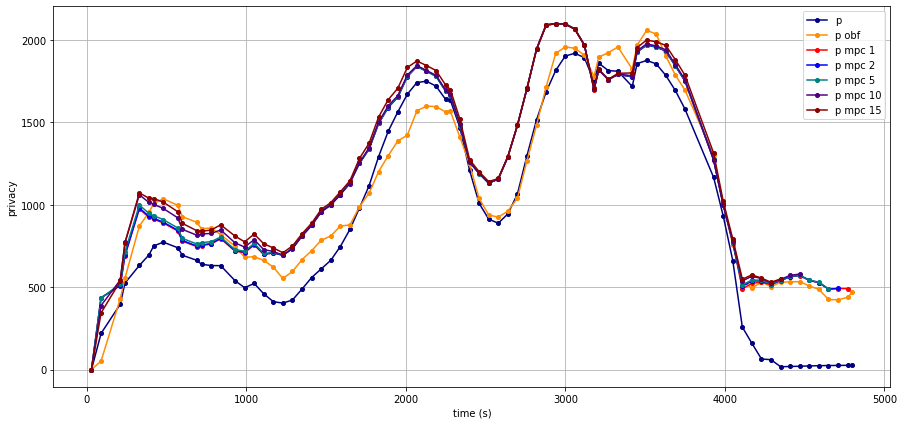

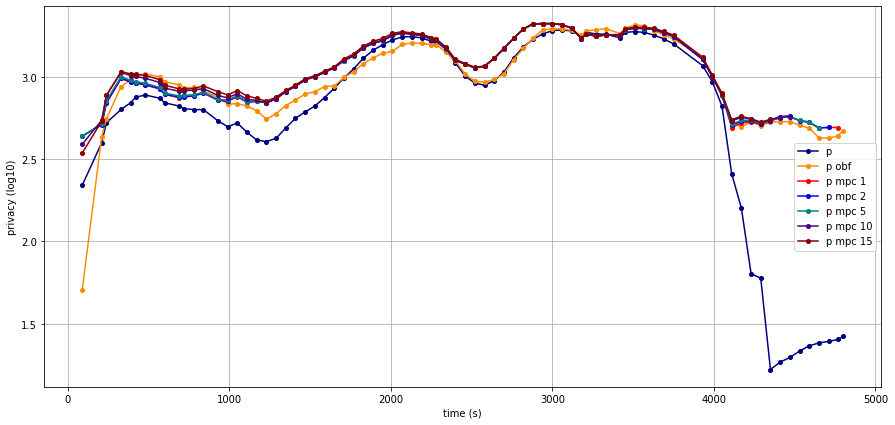

In [25]:
#Privacy plot
fig = figure(plot_width=900, plot_height=450)
fig.line(Time[bs>0], priv[bs>0], line_color=Colors[0], legend_label="p")
fig.circle(Time[bs>0], priv[bs>0], color=Colors[0], legend_label="p ")
fig.line(Time[bs>0], priv_obf[bs>0], line_color=Colors[1], legend_label="p Geo-I")
fig.circle(Time[bs>0], priv_obf[bs>0], color=Colors[1], legend_label="p Geo-I")


i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    fig.line(Time[0:len(priv_mpc)][bs[0:len(priv_mpc)]>0], priv_mpc[bs[0:len(priv_mpc)]>0], line_color=Colors[i], legend_label="p mpc "+str(h))
    fig.circle(Time[0:len(priv_mpc)][bs[0:len(priv_mpc)]>0], priv_mpc[0:len(priv_mpc)][bs[0:len(priv_mpc)]>0], color=Colors[i], 
               legend_label="p mpc "+str(h))
    i += 1
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy"
show(fig)


#Log privacy log
fig = figure(plot_width=900, plot_height=450)
fig.line(Time[(bs>0) & (priv>0)], np.log10(priv[(bs>0) & (priv>0)]), line_color='navy', legend_label="p")
fig.circle(Time[(bs>0) & (priv>0)], np.log10(priv[(bs>0) & (priv>0)]), color='navy', legend_label="p ")
fig.line(Time[(bs>0) & (priv>0)], np.log10(priv_obf[(bs>0) & (priv_obf>0)]), line_color='orange', legend_label="p Geo-I")
fig.circle(Time[(bs>0) & (priv>0)], np.log10(priv_obf[(bs>0) & (priv_obf>0)]), color='orange', legend_label="p Geo-I")
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    fig.line(Time[0:len(priv_mpc)][(bs[0:len(priv_mpc)]>0) & (priv_mpc>0)], np.log10(priv_mpc[(bs[0:len(priv_mpc)]>0) & (priv_mpc>0)]), line_color=Colors[i], legend_label="p mpc "+str(h))
    fig.circle(Time[0:len(priv_mpc)][(bs[0:len(priv_mpc)]>0) & (priv_mpc>0)], np.log10(priv_mpc[0:len(priv_mpc)][(bs[0:len(priv_mpc)]>0) & (priv_mpc>0)]), color=Colors[i], 
               legend_label="p mpc "+str(h))
    i += 1
fig.xaxis.axis_label = "time [s]"
fig.yaxis.axis_label = "privacy (log10)"
show(fig)



plt.figure(figsize=(15, 7))
plt.plot(Time[bs>0], priv[bs>0], "o-", color=Colors[0])
plt.plot(Time[bs>0], priv_obf[bs>0], "o-", color=Colors[1])
lgnd = ['p', 'p obf']
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    plt.plot(Time[0:len(priv_mpc)][bs[0:len(priv_mpc)]>0], priv_mpc[bs[0:len(priv_mpc)]>0], "o-", color=Colors[i])
    lgnd += ["p mpc "+str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("privacy")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv_mpc_v3.tex")

plt.figure(figsize=(15, 7))
plt.plot(Time[(bs>0) & (priv>0)], np.log10(priv[(bs>0) & (priv>0)]), "o-", color=Colors[0])
plt.plot(Time[(bs>0) & (priv>0)], np.log10(priv_obf[(bs>0) & (priv_obf>0)]), "o-", color=Colors[1])
lgnd = ['p', 'p obf']
i = 2
for h in horizons:
    priv_mpc = Data_MPC[h].priv
    plt.plot(Time[0:len(priv_mpc)][(bs[0:len(priv_mpc)]>0) & (priv_mpc>0)], np.log10(priv_mpc[(bs[0:len(priv_mpc)]>0) & (priv_mpc>0)]), "o-", color=Colors[i])
    lgnd += ["p mpc "+str(h)]
    i += 1
plt.xlabel("time (s)")
plt.ylabel("privacy (log10)")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/time_priv_mpc_log_v3.tex")


## Gain

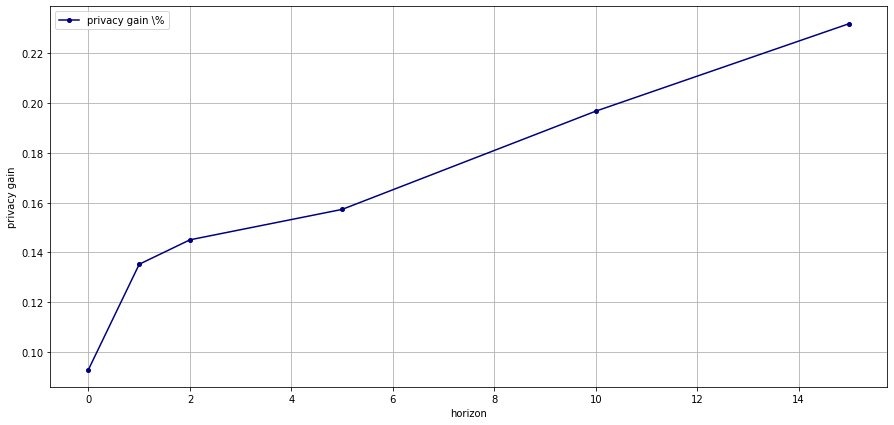

In [26]:
fig = figure(plot_width=900, plot_height=450)
fig.line(np.array([0]+horizons), [(p_obf-p_raw)/p_raw]+Pper_mpc, line_color='navy', 
         legend_label="privacy gain %")
fig.circle(np.array([0]+horizons), [(p_obf-p_raw)/p_raw]+Pper_mpc, line_color='navy', 
           legend_label="privacy gain %")
fig.xaxis.axis_label = "horizon"
fig.yaxis.axis_label = "privacy improvement"
fig.x_range = Range1d(0, max(horizons))
fig.y_range = Range1d(0, max(Pper_mpc)*1.25)
show(fig)


plt.figure(figsize=(15, 7))
plt.plot(np.array([0]+horizons), [(p_obf-p_raw)/p_raw]+Pper_mpc,  "o-", color=Colors[0])
lgnd = ['privacy gain \%']
plt.xlabel("horizon")
plt.ylabel("privacy gain")
plt.legend(lgnd)
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/zh_priv_mpc.tex")


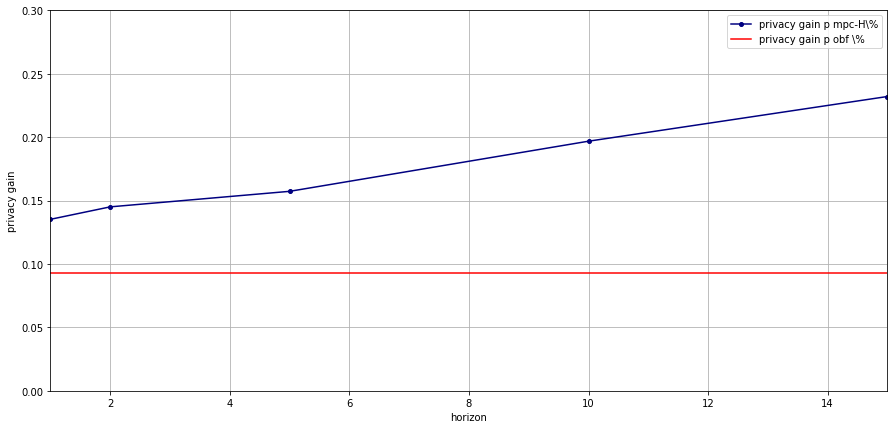

In [27]:
fig = figure(plot_width=900, plot_height=450)
fig.line(np.array(horizons), Pper_mpc, line_color='navy', legend_label="privacy gain %")
fig.circle(np.array(horizons), Pper_mpc, line_color='navy', legend_label="privacy gain %")
fig.line(np.array(horizons), [(p_obf-p_raw)/p_raw]*len(horizons), line_color='red', legend_label="privacy gain gaussian %")
fig.xaxis.axis_label = "horizon"
fig.yaxis.axis_label = "privacy improvement"
fig.x_range = Range1d(1, max(horizons))
fig.y_range = Range1d(0, max(Pper_mpc)*1.25)
show(fig)

plt.figure(figsize=(15, 7))
plt.plot(np.array(horizons), Pper_mpc,  "o-", color=Colors[0],label='privacy gain p mpc-H\%')
#lgnd = ['privacy gain \%']
plt.plot(np.array(horizons), [(p_obf-p_raw)/p_raw]*len(horizons),'r-',label="privacy gain p obf \%")
plt.xlabel("horizon")
plt.ylabel("privacy gain")
plt.ylim([0,0.3])
plt.xlim([1,15])
plt.legend()
plt.grid(True)

mpl.rcParams['lines.markersize'] = 4
tikzplotlib.save(sol_file+"/zh2_priv_mpc_v3.tex")